## **Import Libraries**
___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

import os
import ast
from typing import Optional, Union
import re

from sklearn.impute import KNNImputer
from scipy.stats import skew, kurtosis, normaltest
from sklearn.preprocessing import MinMaxScaler, RobustScaler

## **Read Files**
___

In [2]:
# Set dataframes to return all the features and not truncated.
pd.set_option('display.max_columns', None)

In [3]:
# Read in all the properties
rosebank_df = pd.read_csv('Data/Rosebank_and_Parktown_real_estate.csv', index_col='Unnamed: 0')
fourways_df = pd.read_csv('Data/Fourways_Sunninghill_and_Lonehill_real_estate.csv', index_col='Unnamed: 0')
modderfontein_df = pd.read_csv('Data/Modderfontein_real_estate.csv', index_col='Unnamed: 0')

# Concatenate all the dataframes into one dataframe
df = pd.concat([rosebank_df, fourways_df, modderfontein_df], axis=0, ignore_index=True)

## **Dataset Identification**
___

In [4]:
# Return the shape and size of the dataset
print(f'Shape of Dataset: {df.shape}\nSize of Dataset: {df.size}')

Shape of Dataset: (5541, 7)
Size of Dataset: 38787


In [5]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=5541, step=1),
 Index(['suburb', 'propert_desc', 'address', 'price', 'property_details',
        'property_features', 'image'],
       dtype='object')]

In [6]:
# Return the datatypes of each feature
df.dtypes

suburb               object
propert_desc         object
address              object
price                object
property_details     object
property_features    object
image                object
dtype: object

In [7]:
# Return the top 5 rows of the dataframe
df.head()

,suburb,propert_desc,address,price,property_details,property_features,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,"['Listing number\nT4808440', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,"['Listing number\nT11656', 'Property type\nFla...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,"['Listing number\nT11616', 'Property type\nHou...","['Bedrooms\n3', 'Bathrooms\n3', 'En-suite\n2',...",https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,"['Listing number\nT4481649', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n2', 'Covered Parki...",https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,"['Listing number\nT4470228', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


In [8]:
# Return the bottom 5 rows of the dataset
df.tail()

,suburb,propert_desc,address,price,property_details,property_features,image
5536,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 300 000,"['Listing number\nT4786340', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2']",https://helium.privateproperty.co.za/live-za-i...
5537,Modderfontein,3 Bed Apartment in Greenstone Gate,NaN,R 1 349 900,"['Listing number\nT4794151', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2']",https://helium.privateproperty.co.za/live-za-i...
5538,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 450 000,"['Listing number\nT4482430', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2', 'En-suite\n1',...",https://helium.privateproperty.co.za/live-za-i...
5539,Modderfontein,3 Bed Townhouse in Modderfontein,NaN,R 1 650 000,"['Listing number\nT4484958', 'Property type\nT...","['Bedrooms\n3', 'Bathrooms\n2', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
5540,Modderfontein,1 Bed Apartment in Modderfontein,NaN,R 970 000,"['Listing number\nT4514266', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


## **Dataset Preprocessing**
___

#### 1. **Dataset Cleaning**

In [9]:
df.head()

,suburb,propert_desc,address,price,property_details,property_features,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,"['Listing number\nT4808440', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,"['Listing number\nT11656', 'Property type\nFla...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,"['Listing number\nT11616', 'Property type\nHou...","['Bedrooms\n3', 'Bathrooms\n3', 'En-suite\n2',...",https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,"['Listing number\nT4481649', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n2', 'Covered Parki...",https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,"['Listing number\nT4470228', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


In [10]:
def featureValueConvert(column: str, dataframe: Optional[pd.DataFrame]=df) -> pd.Series:
    """
    A function that converts the values of a feature from a string into python literal structures, 
    and in this case, into a list.
    
    Args:
        column:
            - Name of a feature that can be found in the pandas dataframe object passed in the
            dataframe parameter that has another python structure stored as a string value.
        dataframe:
            - A pandas dataframe object.

    Returns:
        conversion:
            A pandas series, with each value being a list

    """
    conversion = dataframe[column].apply(ast.literal_eval)

    return conversion


features_to_convert = ['property_details', 'property_features']
for feature in features_to_convert:
    df[feature] = featureValueConvert(feature)

In [11]:
def featureToDataframe(column: str, dataframe: Optional[pd.DataFrame]=df) -> pd.DataFrame:
    """
    Unpacks elements from a list within a specified DataFrame column into a new DataFrame.

    This function assumes that the elements of the specified column are lists of strings,
    where each string contains two parts separated by a newline character ('\\n'). The first
    part is treated as a key, and the second part as a value. These key-value pairs are 
    unpacked into a new DataFrame, where each dictionary created from the list becomes a row.
    
    Args:
        column:
            - The name of the column containing lists to unpack.
            
        dataframe:
            - The DataFrame that contains the column to be processed. Defaults to a pre-defined DataFrame (df).
    
    Returns:
        feature_dataframe:
            - A new DataFrame where each row corresponds to the unpacked dictionary of key-value pairs.
    """
    # Initialize an empty list to store the dictionaries unpacked from each list element
    unpacked_data = []
    
    # Loop over each row in the DataFrame
    for i in range(dataframe.shape[0]):
        data = {}

        # Loop through each element in the list for the current row
        for element in dataframe[column][i]:
            
            # Split the string by newline ('\n')
            li = element.split('\n')

            # Create a dictionary with the key-value pair
            dct = {li[0]: li[1]}
            data.update(dct)

        # Append the row's dictionary to the list of unpacked data
        unpacked_data.append(data)

    # Create a DataFrame from the list of dictionaries
    feature_dataframe = pd.DataFrame(unpacked_data)
    
    return feature_dataframe

# Create a copy of the dataframe
df2 = df.copy()

# Create dataframe from the two features with lists as values
property_details_df = featureToDataframe('property_details')
property_features_df = featureToDataframe('property_features')

# Concatenate all the dataframes
df2 = (
    pd.concat([df2.drop(columns=['property_details', 'property_features']),
               property_details_df, property_features_df], axis=1)
)

In [12]:
# Store the desired column order 
column_order = ['suburb', 'propert_desc', 'address', 'price', 'Listing number',
       'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies',
       'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas',
       'Garages', 'Storeys', 'En-suite', 'Covered Parkings', 'image']

# Reorder the dataframe columns
df2.reindex(columns=column_order)

,suburb,propert_desc,address,price,Listing number,Property type,Erf size,Floor size,Rates and taxes,Levies,Bedrooms,Bathrooms,Lounges,Open Parkings,Dining Areas,Garages,Storeys,En-suite,Covered Parkings,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,T4808440,Apartment,4 418 m²,74 m²,R 761,R 2 102,2,1,1,2,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,T11656,Flat,NaN,116 m²,R 1 139,R 2 220,2,1,1,NaN,1,1,1,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,T11616,House,1 012 m²,NaN,R 2 242,NaN,3,3,1,3,2,2,1,2,NaN,https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,T4481649,Apartment,NaN,72 m²,R 386,R 1 900,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,T4470228,Apartment,NaN,36 m²,NaN,R 993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 300 000,T4786340,Apartment,NaN,103 m²,NaN,R 2 558,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
5537,Modderfontein,3 Bed Apartment in Greenstone Gate,NaN,R 1 349 900,T4794151,Apartment,NaN,101 m²,R 1 146,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
5538,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 450 000,T4482430,Apartment,75 m²,75 m²,R 600,R 1 774,3,2,1,1,NaN,NaN,NaN,1,2,https://helium.privateproperty.co.za/live-za-i...
5539,Modderfontein,3 Bed Townhouse in Modderfontein,NaN,R 1 650 000,T4484958,Townhouse,NaN,104 m²,R 1 028,R 2 615,3,2,1,NaN,NaN,NaN,NaN,NaN,2,https://helium.privateproperty.co.za/live-za-i...


In [13]:
def alphaCharRemove(column: str, dataframe: pd.DataFrame) -> pd.Series:
    """
    Remove all non-numeric characters (letters, special characters) from a specified column in a DataFrame.

    Args:
        column:
            - The column name from which to remove non-numeric characters.
            dataframe (pd.DataFrame): The DataFrame that contains the specified column.

    Returns:
        new_feature: 
            - A new column (as a Series) with all non-numeric characters removed from the original values.
    """
    # Use regex to remove any non-numeric characters from the specified column
    new_feature = dataframe[column].replace(r'[\D$]', '', regex=True)

    return new_feature

In [14]:
def unitsCheck(column: str, dataframe: pd.DataFrame) -> None:
    """
    Identify and display all unique non-numeric characters (units) present in a specified column of a DataFrame.

    Args:
        column:
            - The column name from which to extract non-numeric characters (units).

        dataframe:
            - The DataFrame that contains the specified column.

    Returns:
        None:
            - This function prints the column name and the unique non-numeric units found.
    """
    # Use regex to remove all digits and spaces, leaving only non-numeric characters (units)
    units = dataframe[column].replace(r'[\d\s]', '', regex=True).unique()
    print(f'Feature: {column}\nUnits: {units}\n')

In [15]:
for feature in df2.loc[:, ['price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies']]:
    # Reaturn the measuring units for the features
    unitsCheck(feature, df2)

Feature: price
Units: ['R' 'OnAuction' 'POA']

Feature: Erf size
Units: ['m²' nan '.ha' 'ha']

Feature: Floor size
Units: ['m²' nan '.m²']

Feature: Rates and taxes
Units: ['R' nan]

Feature: Levies
Units: ['R' nan]



In [16]:
# Return total number of properties in the dataframe that are POA or Auction for price.
poa_auction_records = df2[df2['price'].isin(['OnAuction', 'POA'])].index
print(f'Total properties that need POA (Price on Appointment) or Auction: {len(poa_auction_records)}')

Total properties that need POA (Price on Appointment) or Auction: 11


In [17]:
# Create a copy of the current dataframe
df3 = df2.copy()

# Remove the 11 records with POA or Auction in the price feature
df3 = df3.drop(index=poa_auction_records).reset_index(drop=True)

In [18]:
for feature in df3.loc[:, ['price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies']]:
    # Remove the measuring units from the values 
    df3[feature] = alphaCharRemove(feature, df3)

In [19]:
# Convert 'price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies' into integer and float values 

In [20]:
df3 = df3.drop(index=df3[df3['price'] == ''].index).reset_index(drop=True)

In [21]:
df3 = df3.astype({
    'price': float,
    'Erf size': float,
    'Floor size': float,
    'Rates and taxes': float,
    'Levies': float
})

In [22]:
df3.dtypes

suburb               object
propert_desc         object
address              object
price               float64
image                object
Listing number       object
Property type        object
Erf size            float64
Floor size          float64
Rates and taxes     float64
Levies              float64
Bedrooms             object
Bathrooms            object
Lounges              object
Open Parkings        object
Dining Areas         object
Garages              object
Storeys              object
En-suite             object
Covered Parkings     object
dtype: object

#### 2. **Duplicated values**

In [23]:
# Return the total number of duplicated values in the dataset
dupes = df3.duplicated().sum()
print(f'Total number of duplicate values in the dataframe: {dupes}')

Total number of duplicate values in the dataframe: 4


In [24]:
# Return a subset of the duplicated values
df3[df3.duplicated()]

,suburb,propert_desc,address,price,image,Listing number,Property type,Erf size,Floor size,Rates and taxes,Levies,Bedrooms,Bathrooms,Lounges,Open Parkings,Dining Areas,Garages,Storeys,En-suite,Covered Parkings
1896,Rosebank and Parktown,3 Bed House in Orchards,NaN,2999000.0,https://helium.privateproperty.co.za/live-za-i...,T3618699,House,1487.0,NaN,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,5
2036,Rosebank and Parktown,2 Bed Apartment in Melrose Arch,NaN,4950000.0,https://helium.privateproperty.co.za/live-za-i...,T3434581,Apartment,NaN,151.0,NaN,NaN,2,2.5,1,NaN,1,2,NaN,NaN,NaN
4386,"Fourways, Sunninghill and Lonehill",1 Bed Apartment in Craigavon,NaN,790000.0,https://helium.privateproperty.co.za/live-za-i...,T4764621,Apartment,NaN,77.0,358.0,2559.0,1,1.5,1,NaN,1,NaN,NaN,NaN,1
4723,"Fourways, Sunninghill and Lonehill",2 Bed Apartment in Sunninghill,NaN,995000.0,https://helium.privateproperty.co.za/live-za-i...,T4779647,Apartment,NaN,98.0,815.0,2046.0,2,1,1,NaN,1,NaN,2,NaN,2


In [25]:
# Store a copy of the current dataframe
df4 = df3.copy()

# Drop the duplicate values annd keep the first instance
df4.drop_duplicates(keep='first', ignore_index=True, inplace=True)

#### 3. **Null Values**

In [26]:
# Identify the total number of null values
nulls = np.count_nonzero(df4.isnull().values)
print(f'Total number of null values in the dataframe: {nulls}')

Total number of null values in the dataframe: 34327


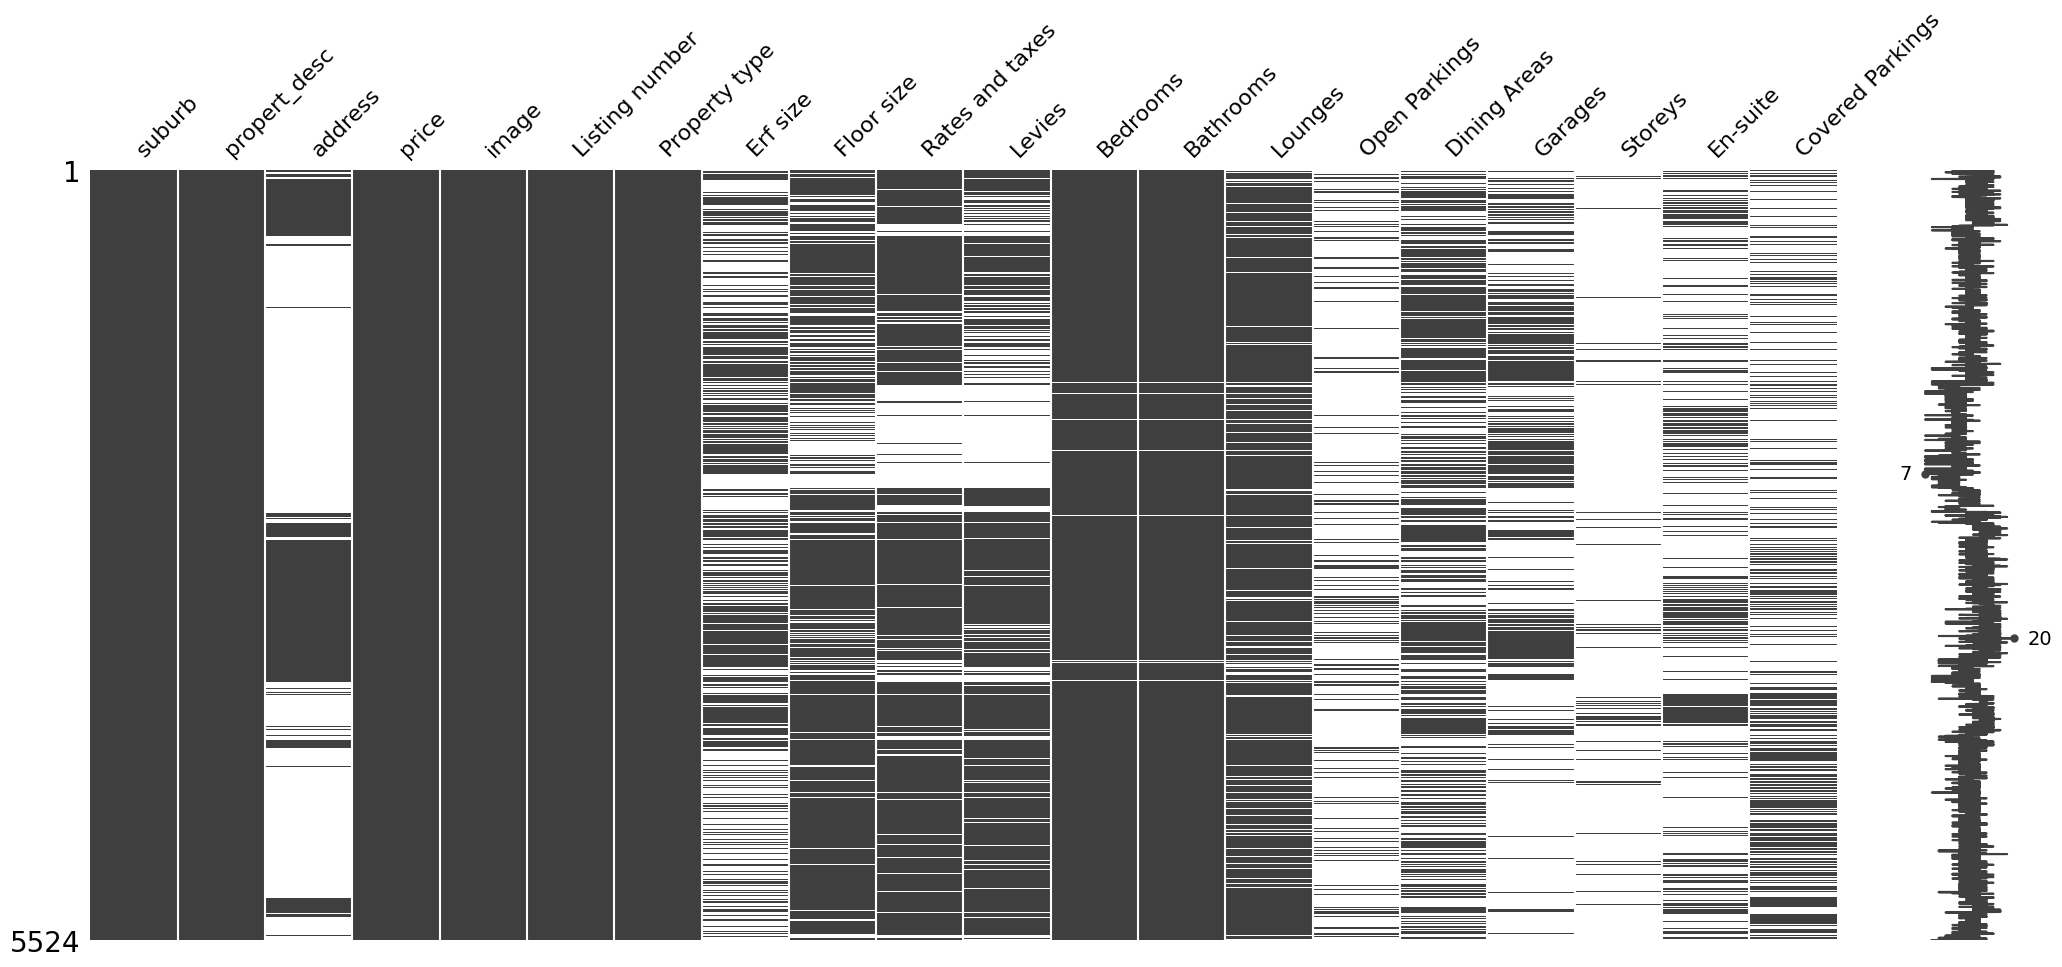

In [27]:
# Visualize the null values in the dataframe
msno.matrix(df4)
plt.show()

In [28]:
# Return the total number of null values per feature
df4.isnull().sum() / df4.shape[0] * 100

suburb               0.000000
propert_desc         0.000000
address             66.328747
price                0.000000
image                0.000000
Listing number       0.000000
Property type        0.000000
Erf size            46.650978
Floor size          22.700941
Rates and taxes     24.094859
Levies              31.028240
Bedrooms             1.321506
Bathrooms            1.321506
Lounges             12.056481
Open Parkings       83.399710
Dining Areas        43.392469
Garages             65.206372
Storeys             92.197683
En-suite            70.492397
Covered Parkings    61.223751
dtype: float64

In [29]:
# Create a copy of the current dataframe
df5 = df4.copy()

# Drop features that have null values greater than 13, excluding floor size. 
df5.drop(columns=['address', 'Erf size', 'Rates and taxes', 'Levies','Open Parkings',
                  'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings'], inplace=True)

In [30]:
# Return the total number of null values per feature after dropping features
df5.isnull().sum()

suburb               0
propert_desc         0
price                0
image                0
Listing number       0
Property type        0
Floor size        1254
Bedrooms            73
Bathrooms           73
Lounges            666
dtype: int64

##### 3.1 **Bedroom Nulls**

In [31]:
# View features with null values for bedrooms
bedrooms_null_df = df5[df5['Bedrooms'].isnull().values]
bedrooms_null_df

,suburb,propert_desc,price,image,Listing number,Property type,Floor size,Bedrooms,Bathrooms,Lounges
64,Rosebank and Parktown,5 245 m² Land available in Waverley,3350000.0,https://helium.privateproperty.co.za/live-za-i...,T4507606,Residential Land,5245.0,NaN,NaN,NaN
409,Rosebank and Parktown,1 020 m² Land available in Orchards,1200000.0,https://helium.privateproperty.co.za/live-za-i...,T4279516,Residential Land,NaN,NaN,NaN,NaN
432,Rosebank and Parktown,907 m² Land available in Craighall,2300000.0,https://helium.privateproperty.co.za/live-za-i...,T4464189,Residential Land,NaN,NaN,NaN,NaN
1421,Rosebank and Parktown,3 504 m² Land available in Craighall,7300000.0,https://helium.privateproperty.co.za/live-za-i...,T4140645,Residential Land,NaN,NaN,NaN,NaN
1425,Rosebank and Parktown,2 681 m² Land available in Dunkeld,7495000.0,https://helium.privateproperty.co.za/live-za-i...,T4802439,Residential Land,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4880,"Fourways, Sunninghill and Lonehill",418 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4773995,Residential Land,NaN,NaN,NaN,NaN
4884,"Fourways, Sunninghill and Lonehill",414 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4717832,Residential Land,NaN,NaN,NaN,NaN
4886,"Fourways, Sunninghill and Lonehill",418 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4671311,Residential Land,NaN,NaN,NaN,NaN
5178,"Fourways, Sunninghill and Lonehill",915 m² Land available in Cedar Creek,1400000.0,https://helium.privateproperty.co.za/live-za-i...,T4732177,Residential Land,NaN,NaN,NaN,NaN


In [32]:
# Return the unique property type for the bedrooms null df
bedrooms_null_df['Property type'].unique()

array(['Residential Land'], dtype=object)

In [33]:
# search for the substring 'land' in the property_desc feature, were land is in the substring,
# return 1, and if not, return 0. Find the sum to find the total number of records with 'land' in the subset
total_land = bedrooms_null_df['propert_desc'].str.count(pat='land', flags=re.IGNORECASE).sum()

# Compare the total number of records with land, and the total records of the berooms_null_df
if total_land == bedrooms_null_df.shape[0]:
    print('All the records are land properties, and not building properties.')
else:
    print('Not all the properties are land properties.')

All the records are land properties, and not building properties.


In [34]:
# Create a copy of the current dataframe
df6 = df5.copy()

# drop the null values in the bedroom feature
df6.dropna(subset='Bedrooms', ignore_index=True, inplace=True)

# Confirm that 74 records have been removed from the previous dataframe to the current dataframe
print(f'{df5.shape[0] - df6.shape[0]} Records have been removed from the current dataframe.')

73 Records have been removed from the current dataframe.


##### 3.2 **Floor Size Nulls**

In [35]:
# Create a copy of the current dataframe
df7 = df6.copy()

# Convert Bedrooms, Bathrooms and Lounges to int values 
df7 = df7.astype({
    'Bedrooms': float, 
    'Bathrooms': float,
    'Lounges': float
})

In [36]:
# Make a copy of the current dataframe
df8 =df7.copy()

# Instantiate the KNNimputer
imputer = KNNImputer()

# Impute null values for floor size and for lounges
df8['Floor size'] = imputer.fit_transform(df8[['Floor size']])
df8['Lounges'] = imputer.fit_transform(df8[['Lounges']])

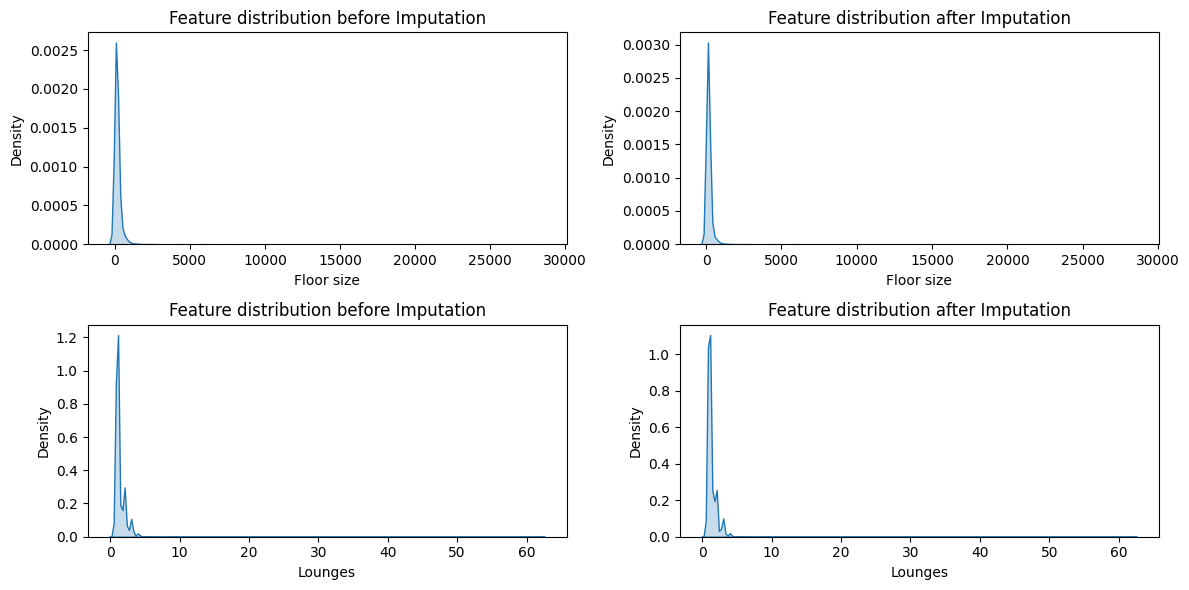

In [37]:
# Check that the imputation did not drastically change the distribution of the features
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.kdeplot(df7['Floor size'], fill=True)
plt.title('Feature distribution before Imputation')

plt.subplot(2, 2, 2)
sns.kdeplot(df8['Floor size'], fill=True)
plt.title('Feature distribution after Imputation')

plt.subplot(2, 2, 3)
sns.kdeplot(df7['Lounges'], fill=True)
plt.title('Feature distribution before Imputation')

plt.subplot(2, 2, 4)
sns.kdeplot(df8['Lounges'], fill=True)
plt.title('Feature distribution after Imputation')

plt.tight_layout()
plt.show()

In [38]:
df8.isnull().sum()

suburb            0
propert_desc      0
price             0
image             0
Listing number    0
Property type     0
Floor size        0
Bedrooms          0
Bathrooms         0
Lounges           0
dtype: int64

#### 4. **Feature Selection**

In [39]:
# return the total number of unique values per feature
df8.apply(lambda x: x.nunique())

suburb               3
propert_desc       642
price              967
image             5451
Listing number    5451
Property type       12
Floor size         470
Bedrooms            23
Bathrooms           27
Lounges             12
dtype: int64

In [40]:
# Create a copy of the current dataframe
df9 = df8.copy()

# Remove the Listing number and the image features
df9 = df8.drop(columns=['Listing number', 'image', 'propert_desc']).reset_index(drop=True)

In [41]:
# Set pandas to display all numeric features with 2 decimal places
round(df9, 0)

df9.head()

,suburb,price,Property type,Floor size,Bedrooms,Bathrooms,Lounges
0,Rosebank and Parktown,1099000.0,Apartment,74.000000,2.0,1.0,1.000000
1,Rosebank and Parktown,2175000.0,Flat,116.000000,2.0,1.0,1.000000
2,Rosebank and Parktown,2950000.0,House,187.511829,3.0,3.0,1.000000
3,Rosebank and Parktown,699000.0,Apartment,72.000000,2.0,2.0,1.346851
4,Rosebank and Parktown,1511000.0,Apartment,36.000000,1.0,1.0,1.346851


#### 5. **One Hot Encoding**

In [42]:
# Crearte a copy of the current dataframe
df10 = df9.copy()

# Apply one hot encoding
df10 = pd.get_dummies(df10, columns=['Property type', 'suburb'], drop_first=True, dtype=int)

#### 6. **Feature Engineering**

In [43]:
# Add a new feature, price per m².
Price_per_size = df10['price'] / df10['Floor size']
df10.insert(df10.columns.get_loc('Bedrooms'), 'Price_per_m²', Price_per_size)

# Return a view of the dataframe
df10.head()

,price,Floor size,Price_per_m²,Bedrooms,Bathrooms,Lounges,Property type_Bachelor,Property type_Cluster,Property type_Duplex,Property type_Flat,Property type_House,Property type_Loft,Property type_Penthouse,Property type_Simplex,Property type_Small Holding,Property type_Studio,Property type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,1099000.0,74.000000,14851.351351,2.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2175000.0,116.000000,18750.000000,2.0,1.0,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2950000.0,187.511829,15732.340772,3.0,3.0,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,1
3,699000.0,72.000000,9708.333333,2.0,2.0,1.346851,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1511000.0,36.000000,41972.222222,1.0,1.0,1.346851,0,0,0,0,0,0,0,0,0,0,0,0,1


#### 7. **Outliers**

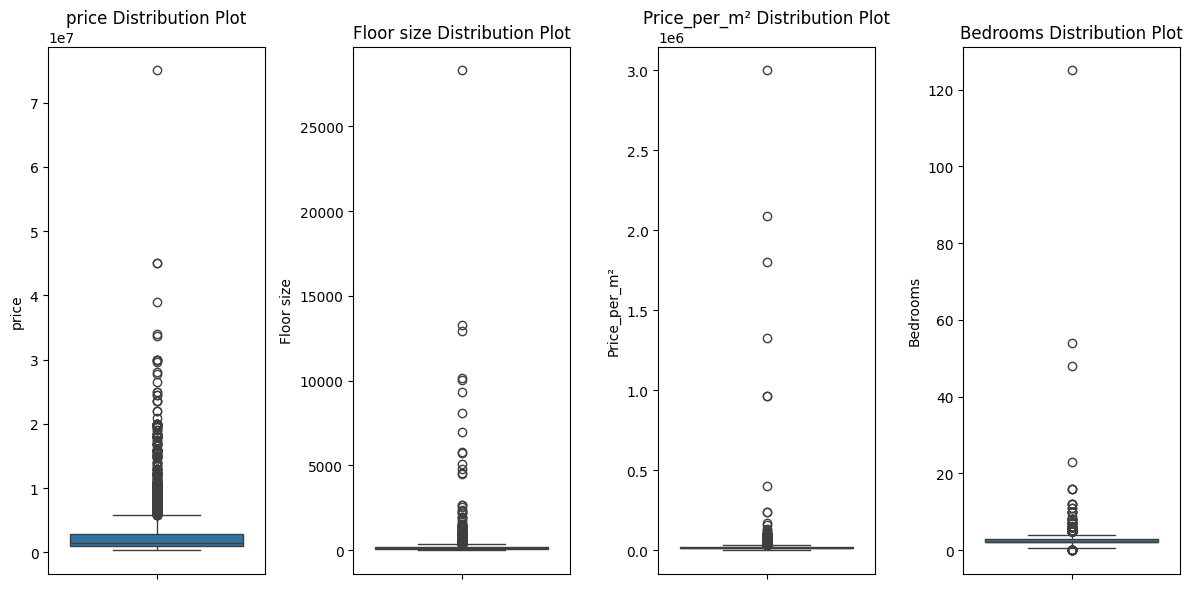

In [44]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(df10.iloc[:, 0:4].columns):
    plt.subplot(1, 4,  1+i)
    sns.boxplot(df10[feature])
    plt.title(f'{feature} Distribution Plot')

plt.tight_layout()
plt.show()

In [45]:
def outlierIQR(dataframe: pd.DataFrame, column: str):
    # Find the first and third quantile values from the feature of the dataframe
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Store the IQR value
    IQR = q3 - q1 

    # Store the upper and lower wick limits 
    upper_limit = dataframe[column] > q3 + (IQR * 3)
    lower_limit = dataframe[column] < q1 - (IQR * 3)   

    # Store the outliers 
    outliers = dataframe[column][upper_limit | lower_limit].index.to_list()

    return outliers

outlier_records = []
for element in df10.iloc[:, 0:4]:
    outliers = outlierIQR(column=element, dataframe=df10)
    outlier_records.append(outliers)
    
# Flatten the nested list of index values
outlier_records = [element for sublist in outlier_records for element in sublist]

In [46]:
# Store an outlier df
outlier_df = df10.loc[outlier_records, :]

In [47]:
# Store the dataframe with no outliers
non_outlier_df = df10[~df10.index.isin(outlier_records)]
non_outlier_df

,price,Floor size,Price_per_m²,Bedrooms,Bathrooms,Lounges,Property type_Bachelor,Property type_Cluster,Property type_Duplex,Property type_Flat,Property type_House,Property type_Loft,Property type_Penthouse,Property type_Simplex,Property type_Small Holding,Property type_Studio,Property type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,1099000.0,74.000000,14851.351351,2.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2175000.0,116.000000,18750.000000,2.0,1.0,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2950000.0,187.511829,15732.340772,3.0,3.0,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,1
3,699000.0,72.000000,9708.333333,2.0,2.0,1.346851,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1945000.0,55.000000,35363.636364,1.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,1300000.0,103.000000,12621.359223,3.0,2.0,1.346851,0,0,0,0,0,0,0,0,0,0,0,1,0
5447,1349900.0,101.000000,13365.346535,3.0,2.0,1.346851,0,0,0,0,0,0,0,0,0,0,0,1,0
5448,1450000.0,75.000000,19333.333333,3.0,2.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,1,0
5449,1650000.0,104.000000,15865.384615,3.0,2.0,1.000000,0,0,0,0,0,0,0,0,0,0,1,1,0


#### 8. **Feature Scaling**

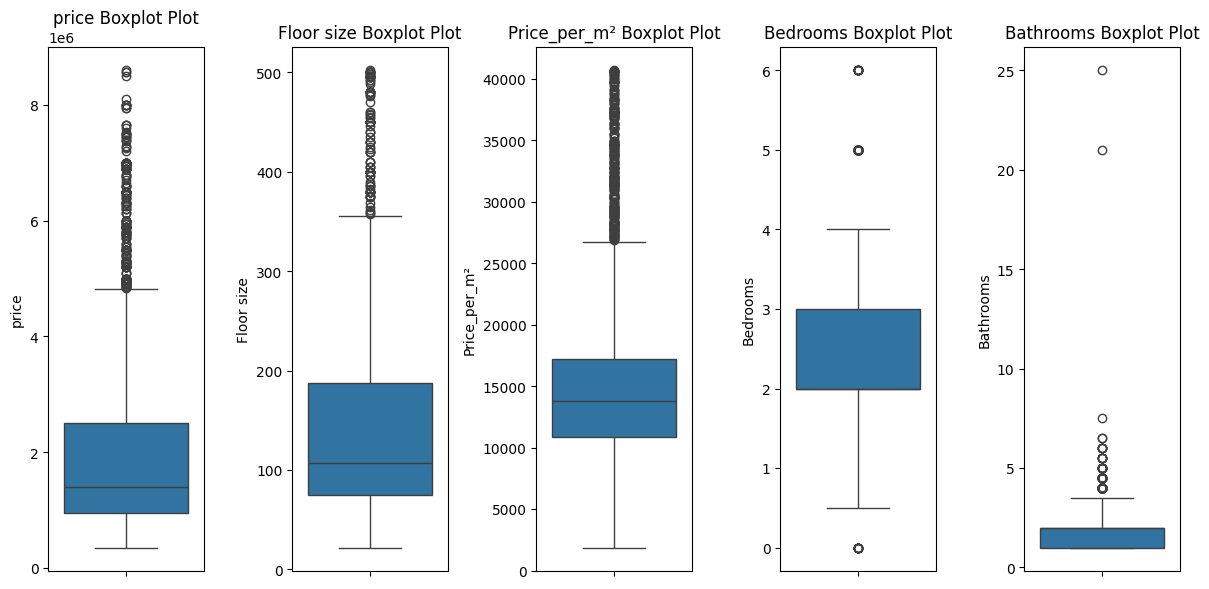

In [48]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(non_outlier_df.iloc[:, 0:5].columns):
    plt.subplot(1, 5,  1+i)
    sns.boxplot(non_outlier_df[feature])
    plt.title(f'{feature} Boxplot Plot')

plt.tight_layout()
plt.show()

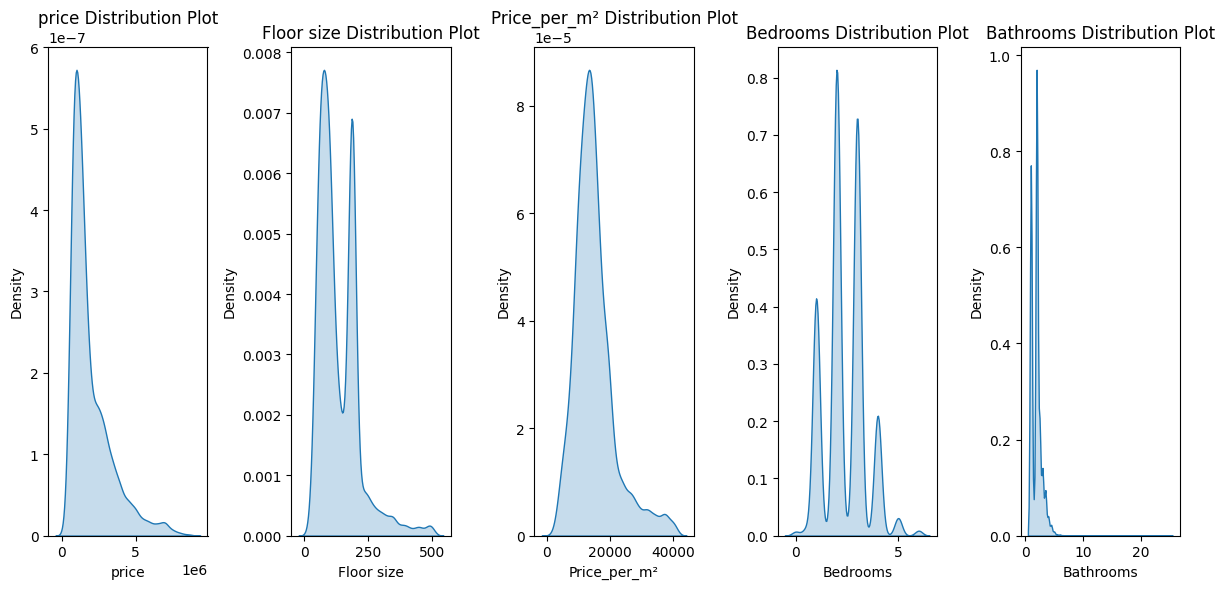

In [49]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(non_outlier_df.iloc[:, 0:5].columns):
    plt.subplot(1, 5, 1+i)
    sns.kdeplot(non_outlier_df[feature], fill=True)
    plt.title(f'{feature} Distribution Plot')

plt.tight_layout()
plt.show()

In [50]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the D'Agostino's K-squared Test. 
    These values help evaluate the distribution of the features of the dataframe passed in to 
    the dataframe parameter. 

    Args: pandas.dataframe.
        - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        _skew = skew(dataframe[column])
        _kurtosis = kurtosis(dataframe[column], fisher=True)
        print(
            f"\n{column}\n"
            f"skew: {_skew:.4f}\n"
            f"kurtosis: {_kurtosis:.4f}"
        )

        # Perform Shapiro-Wilk test
        stat, p_value = normaltest(dataframe[column])

        # Print the results
        print(f"D'Agostino's K-squared Test: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        # Interpret the p-value
        alpha = 0.05
        if p_value > alpha:
            print("The data is likely normally distributed (fail to reject H0).")
        else:
            print("The data is not normally distributed (reject H0).")

        # Check the absolute values of each skew value of a feature
        if np.abs(_skew) < 0.5:
            print('distribution is almost symmetrical')
        elif 0.5 <= np.abs(_skew) <= 1:
            print('distribution is modertely skewed')
        else:
            print('distribution is highly skewed')
        
        # Extremity of tail distribution
        if _kurtosis > 0:
            print(
                f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                f'normal distribution.\n'
                f'This type of distribution is often associated with higher peakedness '
                f'and a greater probability of extreme values.\n'
            )
        elif _kurtosis < 0:
            print(
                f'Platykurtic distribution - lighter tails and a flatter peak than the '
                f'normal distribution.\n'
                f'This type of distribution is often associated with less peakedness ' 
                f'and a lower probability of extreme values.\n'
            )
        else:
            print(
                f'Mesokurtic distribution - similar peak and tail shape as the normal '
                f'distribution.\n'
                )
                

statistics(non_outlier_df.iloc[:, 0:5])


price
skew: 1.7397
kurtosis: 3.0779
D'Agostino's K-squared Test: 1610.0629
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


Floor size
skew: 1.5825
kurtosis: 3.5512
D'Agostino's K-squared Test: 1523.7933
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


Price_per_m²
skew: 1.4093
kurtosis: 2.6817
D'Agostino's K-squared Test: 1273.1879
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak th

`NOTES`:

- Judging from the Distribution of the features price, floor space, bedrooms and bathrooms, we can see the bedroom and the bathroom features are made up of discrete values with a small range of values. With the floor size and features, we can see that the features look highly skewed, and the shape of the distribution suggests a log transformation before scaling the feature. 

| Feature | Skew | Null Hypothesis | Distribution Type | Transformation | Scale Method |
| ------- | ---- | --------------- | ----------------- | -------------- | ------------ |
| Price | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |
| Floor Size | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |
| Bedrooms | +ve skew | Rejected | Leptokurtic | No | RobustScaler |
| Bathrooms | Highly Skewed | Rejected | Leptokurtic | No | RobustScaler |
| Price_per_m² | Highly Skewed | Rejected | Leptokurtic | True | RobustScaler |

- Due to the other features being one hot encoded features, we will apply MinMaxScaler to scale the features. 


In [51]:
def featureScaling(dataframe: pd.DataFrame, column: str) -> np.ndarray:
    """
    This function applies appropriate feature scaling techniques to a column of a DataFrame.
    It performs a log transformation followed by robust scaling for highly skewed features
    like 'Floor size' and 'price'. Other numerical features like 'Bedrooms' and 'Bathrooms'
    are scaled using robust scaling. For other features, MinMaxScaler is used.

    Parameters:
        dataframe: 
            - The DataFrame containing the data.
        column: 
            - The name of the feature to scale.

    Returns:
        new_feature:
            - The scaled feature values.
    """

    if column in ['Floor size', 'price', 'Price_per_m²']:
        # Transform the highly skewed feature using log transformation
        log_transform = np.log1p(dataframe[[column]])

        # Instantiate the MinMaxScaler
        scaler = RobustScaler()

        # Fit and transform the data of the feature
        new_feature = scaler.fit_transform(log_transform) 
        
        # Output confirmation of the feature that has been scaled using transformation and scale
        print(f'{column} has been transformed using log transformation and scaled using Robust Scaler.\n')

        return new_feature
    
    if (column == 'Bedrooms') | (column == 'Bathrooms'):
        # Instantiate the RobustScaler
        scaler = RobustScaler()

        # Fit and transform the data of the feature
        new_feature = scaler.fit_transform(dataframe[[column]])

        # Output confirmation of the feature that has been scaled using transformation and scale
        print(f'{column} has been scaled using Robust Scaler.\n')

        return new_feature

    else:
        if dataframe[column].nunique() > 2:
            # Instantiate the MinMaxScaler
            scaler = MinMaxScaler()

            # Fit and transform the data of the feature
            new_feature = scaler.fit_transform(dataframe[[column]])

            # Output confirmation of the feature that has been scaled using transformation and scale
            print(f'{column} has been scaled using Normalization.\n')

            return new_feature
        
        else:
            # Convert pandas series into a numpay array
            return dataframe[column].to_numpy()


# Set a blank dictionary to store each scaled feature 
table_data = {}

# Iterate through all the columns of the dataframe, non_outlier_df
for column in non_outlier_df:

    # Apply the feature transformation and store as a variable
    scaled_feature = featureScaling(dataframe=non_outlier_df, column=column)

    # Store a dictionary of the feature name from the dataframe as the key, and the scaled data  
    # as the value.
    data = {column: scaled_feature.flatten()}

    # Add the dictionary to the table_data list.
    table_data.update(data)


# Convert the list of dictionaries into a dataframe 
scaled_df = pd.DataFrame(table_data)

scaled_df.head()

price has been transformed using log transformation and scaled using Robust Scaler.

Floor size has been transformed using log transformation and scaled using Robust Scaler.

Price_per_m² has been transformed using log transformation and scaled using Robust Scaler.

Bedrooms has been scaled using Robust Scaler.

Bathrooms has been scaled using Robust Scaler.

Lounges has been scaled using Normalization.



,price,Floor size,Price_per_m²,Bedrooms,Bathrooms,Lounges,Property type_Bachelor,Property type_Cluster,Property type_Duplex,Property type_Flat,Property type_House,Property type_Loft,Property type_Penthouse,Property type_Simplex,Property type_Small Holding,Property type_Studio,Property type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,-0.249546,-0.401400,0.162292,0.0,-1.0,0.058824,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.456243,0.088111,0.663366,0.0,-1.0,0.058824,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0.771361,0.613180,0.286167,1.0,1.0,0.058824,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-0.717404,-0.431154,-0.751489,0.0,0.0,0.099629,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.340684,-0.722985,2.027286,-1.0,-1.0,0.058824,0,0,0,0,0,0,0,0,0,0,0,0,1


#### `PREPROCESSING SUMMARY`:

1. **Dataset Cleaning**
    - Converted each value in the property_details and property_features columns into list values. Proceeded to split each element in each list data point at the '\\n' character, and took the first element of the list as the key, and the second element as the value element. each dictionary represented a seperate value, and these dictionaries where appended into a single list in order to create dataframes for each feature. These dataframes were then concatenated to a copy of the original dataframe, where the property_details and property_features columns were dropped, creating a new dataframe with the same number of records as the original dataframe, but with the following features. `['suburb', 'propert_desc','address', 'price', 'image', 'Listing number', 'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies', 'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings']`. 

    - Dropped the following records `[2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 4874, 5433]`. These records had either POA or Auction for price rather than the rand value. 

    - Reordered the feature order into `['suburb', 'propert_desc','address', 'price', 'Listing number', 'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies', 'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings', 'image']`.

    - Removed the measuring unit for the following features: `['price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies']`, and converted the features to float values.


2. **Duplicate Values**
    - Identified 4 duplicate values in the dataframe.
    
    - Dropped records with the following indexes: `1897, 2037, 4397, 4734`. 

3. **Null Values**
    - Identified a total of 34425 null values in the dataset

    - Removed the following features from the dataset as there were too many null values in the features: `['address', 'Erf size', 'Rates and taxes', 'Levies','Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings']`

    - There were 73 null records identified in the bedroom feature

    - Look at the records where the Bedroom feature had null values, and found that these records were land properties and not building properties, which would make sense for them not to have bedrooms, however, this will be a feature we look to be using in the training of our prediction model, so records with null values in the bedroom feature were removed. Index of the records removed: `[64,  409,  432, 1421, 1425, 1428, 1430, 1516, 1524, 1537, 1586, 1601, 1603, 1759, 1760, 1790, 1906, 1937, 2013, 2053, 2061, 2062, 2080, 2090,2108, 2111, 2143, 2147, 2151, 2152, 2166, 2168, 2181, 2461, 2487, 2489, 2534, 3161, 3251, 3263, 3353, 3424, 3521, 3527, 3529, 3530, 3532, 3533, 3544, 3545, 3548, 3568, 3639, 3640, 3641, 3648, 3661, 3662, 3663, 3664,
    3670, 3671, 3672, 3673, 3674, 3675, 3677, 3678, 3682, 4892, 4896, 4898, 5190, 5192]`

    - Convert Bedroom, Bathrooms, Lounges into integer values. 

    - Applied KNNImputer to impute the null values of Lounges and Floor size based on the values of the other features.

4. **Feature Selection**
    - Removed the Listing number and the image features as these were all unique values that would not add to the predictive model.     

    - Property_desc feature has also been dropped because the information stored in the feature values are dound as seperate features in the dataset. No other statistical significant information can be gathered through this feature. 

5. **One Hot Encoding**
    - Applied One Hot Encoding on the property type and the suburb feature

6. **Outlier Values**
    - Remove all the outliers from the features: price, floor size, bedrooms and bathrooms. 
    

## **Predictive Analysis**
___

#### 1. **Split Data**

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Store the dependent and the independent variables
X = scaled_df.drop(columns=['price'])
y = scaled_df['price']

# Split into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#### 2. **Model Prediciton**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

def modelPredict(
        model: Union[LinearRegression, RandomForestRegressor, GradientBoostingRegressor,
                     xgb.XGBClassifier],
        X_train: Optional[pd.DataFrame]=X_train, 
        y_train: Optional[pd.DataFrame]=y_train,
        X_test: Optional[pd.DataFrame]=X_test,
        model_return: Optional[bool]=False
) ->np.ndarray:
    """
    Trains a model and makes predictions.

    Parameters:
        - model: A machine learning model (either LogisticRegression or RandomForestClassifier).
        - X_train: Training feature data.
        - y_train: Training labels.
        - X_test: Test feature data for prediction.

    Returns:
        - y_pred: Predicted labels for the test data, to be compared to known test data.
    """
    # Fit the model with training data
    model.fit(X_train, y_train)

    # Make predictions with the fitted model
    y_pred = model.predict(X_test)

    if model_return == True:
        return model, y_pred
    else:
        return y_pred


#### 3. **Model Evaluation**

In [55]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def modelEvaluation(y_pred):
    # 1. Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

    # 2. Root Mean Squared Error (RMSE)
    rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # 3. R-squared (R^2)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R^2): {r2 * 100:.4f}%\n")

In [56]:
# Instantiate all the models with the default settings
mlr = LinearRegression()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgr = xgb.XGBRegressor(random_state=42)

# Return the predictions from each model 
y_pred_mlr = modelPredict(mlr)
y_pred_rfr = modelPredict(rfr)
y_pred_gbr = modelPredict(gbr)
y_pred_xgr = modelPredict(xgr)

# Store all the predictions in a list 
predictions = [y_pred_mlr, y_pred_rfr, y_pred_gbr, y_pred_xgr]
values = ['Multiple Linear Regression', 'Random Forest Regression',
          'Gradient Boosting Regression', 'XGBoost Regression']

for key, pred in enumerate(predictions):
    print(values[key])
    modelEvaluation(pred)

Multiple Linear Regression
Mean Absolute Error (MAE): 0.0011
Root Mean Squared Error (RMSE): 0.0419
R-squared (R^2): 99.9993%

Random Forest Regression
Mean Absolute Error (MAE): 0.0140
Root Mean Squared Error (RMSE): 0.1921
R-squared (R^2): 99.6768%

Gradient Boosting Regression
Mean Absolute Error (MAE): 0.0369
Root Mean Squared Error (RMSE): 0.2301
R-squared (R^2): 99.3350%

XGBoost Regression
Mean Absolute Error (MAE): 0.0196
Root Mean Squared Error (RMSE): 0.1985
R-squared (R^2): 99.6311%



#### 4. **Hyperparameter Tuning**

In [57]:
# Random Forest Regressor 
rfr_params = {
    'n_estimators': [50, 100, 300, 500], 
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [None, 3, 5, 7, 9],
}

# Instantiate gridsearch
rfr_reg = GridSearchCV(rfr, rfr_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model
best_rfr_reg = rfr_reg.fit(X_train, y_train)

# Store the best estimator
best_rfr_reg = best_rfr_reg.best_estimator_
best_rfr_reg

Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


RandomForestRegressor(n_estimators=50, random_state=42)

In [58]:
# Random Forest Regressor 
gbr_params = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 300, 500], 
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [None, 3, 5, 7, 9],
}

# Instantiate gridsearch
gb_reg = GridSearchCV(gbr, gbr_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model
best_gb_reg = gb_reg.fit(X_train, y_train)

# Store the best estimator
best_gb_reg = best_gb_reg.best_estimator_
best_gb_reg

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan 

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.0001,
                          max_depth=None, n_estimators=50, random_state=42)

In [59]:
# Random Forest Regressor 
xgbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Instantiate gridsearch
xgb_reg = GridSearchCV(xgr, xgbr_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model
best_xgb_reg = xgb_reg.fit(X_train, y_train)

# Store the best estimator
best_xgb_reg = best_xgb_reg.best_estimator_
best_xgb_reg

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
# Store predictions of estimator
y_rfr_hyp_pred = best_rfr_reg.predict(X_test)
y_gbr_hyp_pred = best_gb_reg.predict(X_test)
y_xgbr_hyp_pred = best_xgb_reg.predict(X_test)

In [61]:
# Store all the predictions in a list 
predictions = [y_rfr_hyp_pred, y_gbr_hyp_pred, y_xgbr_hyp_pred]
values = ['Multiple Linear Regression', 'Random Forest Regression',
          'Gradient Boosting Regression', 'XGBoost Regression']

for key, pred in enumerate(predictions):
    print(values[key])
    modelEvaluation(pred)

Multiple Linear Regression
Mean Absolute Error (MAE): 0.0141
Root Mean Squared Error (RMSE): 0.1906
R-squared (R^2): 99.6868%

Random Forest Regression
Mean Absolute Error (MAE): 0.5433
Root Mean Squared Error (RMSE): 0.8039
R-squared (R^2): 0.8856%

Gradient Boosting Regression
Mean Absolute Error (MAE): 0.2965
Root Mean Squared Error (RMSE): 0.6081
R-squared (R^2): 67.5491%

